In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
x=df[['Annual Income (k$)',	'Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from  sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

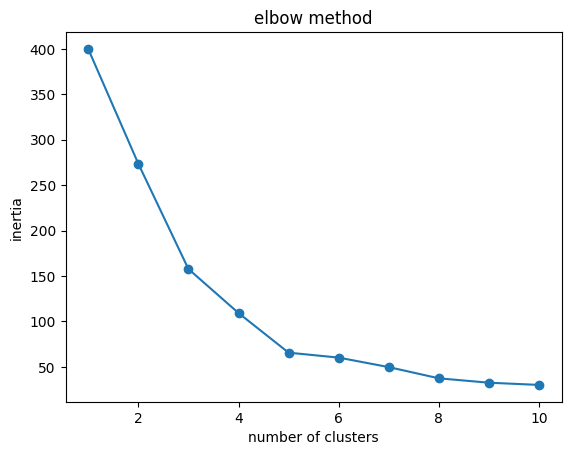

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]

for k in range(1,11):
     kmeans=KMeans(n_clusters=k,random_state=42)
     kmeans.fit(x_scaled)
     inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.title("elbow method")
plt.show()

     

In [11]:
kmeans=KMeans(n_clusters=5,random_state=42)
clusters=kmeans.fit_predict(x_scaled)
clusters[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [12]:
df['Cluster']=clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [13]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


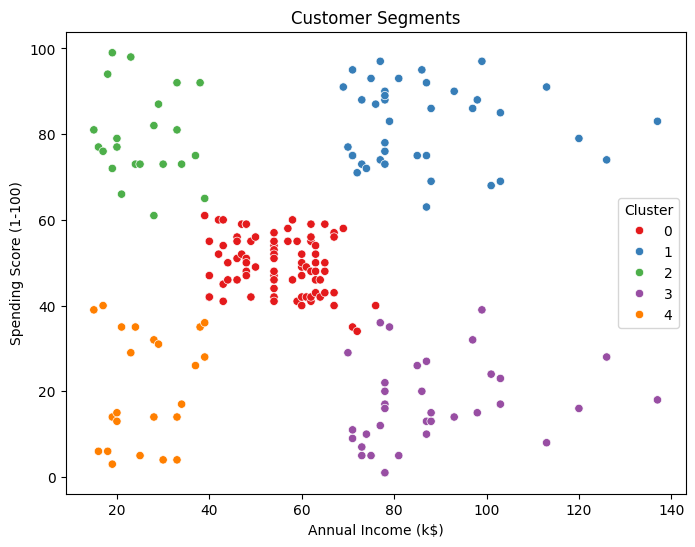

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("Customer Segments")
plt.show()

In [ ]:
# Based on K-Means clustering, customers were segmented into 5 groups based on Annual Income and Spending Score. This helps businesses target high-value customers and create personalized marketing strategies.